In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_allDet_1d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/alldetected/alldetected_1d.csv', low_memory=False)
df_allDet_6d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/alldetected/alldetected_6d.csv', low_memory=False)
df_allDet_9d = pd.read_csv('/mnt/sdb1/Project_Sieja_MCLR_52/2_pipeline/7_counting_transcripts/noncoding_novel/opracowane_deseq/podejcie_MW/alldetected/alldetected_9d.csv', low_memory=False)

In [3]:
df_allDet_1d.set_index('ID', inplace=True)
df_allDet_1d['day'] = 1
df_allDet_6d.set_index('ID', inplace=True)
df_allDet_6d['day'] = 6
df_allDet_9d.set_index('ID', inplace=True)
df_allDet_9d['day'] = 9
df_allDet_1d.head()

,PBS_1d_1,PBS_1d_2,PBS_1d_3,PBS_1d_4,MC_1d_1,MC_1d_2,MC_1d_3,padj,log2FoldChange,pvalue,foldChange,log10padj,day
ID,,,,,,,,,,,,,
TRINITY_DN100003_c1_g1_i1,7.817199,14.355224,28.491641,0.905415,24.794599,17.592376,28.838706,0.591315,0.880855,0.340774,1.841467,0.228181,1
TRINITY_DN100004_c4_g2_i2,8.794349,19.738433,23.579289,7.243323,23.761490,41.886609,54.072574,0.121629,1.426325,0.025610,2.687613,0.914965,1
TRINITY_DN100005_c7_g2_i1,781.719872,715.966796,566.885408,826.644268,1365.769144,1068.946249,1544.072397,0.008319,0.875168,0.000725,1.834222,2.079922,1
TRINITY_DN100005_c8_g3_i1,98.692134,91.514553,90.387275,224.543021,53.721630,46.913002,85.314506,0.162885,-1.031555,0.039173,0.489183,0.788120,1
TRINITY_DN100005_c9_g1_i1,18.565847,3.588806,21.614348,3.621662,2.066217,1.675464,1.201613,0.102135,-2.832575,0.019972,0.140382,0.990827,1


In [ ]:
# TRINITY_DN81499_c3_g6_i1 
# TRINITY_DN80414_c8_g1_i6

In [45]:
df_trin1 = df_allDet_1d[['log2FoldChange', 'day']].loc[['TRINITY_DN81499_c3_g6_i1', 'TRINITY_DN80414_c8_g1_i6']]

In [46]:
df_trin6 = df_allDet_6d[['log2FoldChange', 'day']].loc[['TRINITY_DN81499_c3_g6_i1', 'TRINITY_DN80414_c8_g1_i6']]

In [47]:
df_trin9 = df_allDet_9d[['log2FoldChange', 'day']].loc[['TRINITY_DN81499_c3_g6_i1', 'TRINITY_DN80414_c8_g1_i6']]

In [48]:
df = [df_trin1, df_trin6, df_trin9]

test = pd.concat(df, axis=0)

test.reset_index(inplace=True)
test

,ID,log2FoldChange,day
0,TRINITY_DN81499_c3_g6_i1,-8.601977,1
1,TRINITY_DN80414_c8_g1_i6,11.768755,1
2,TRINITY_DN81499_c3_g6_i1,-9.912948,6
3,TRINITY_DN80414_c8_g1_i6,12.956501,6
4,TRINITY_DN81499_c3_g6_i1,-8.452093,9
5,TRINITY_DN80414_c8_g1_i6,11.686998,9


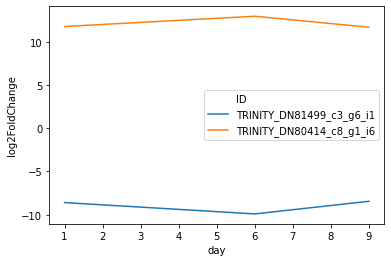

In [50]:
#sns.boxplot(x='day', y='log2FoldChange',  data=test, hue='ID')
sns.lineplot(x='day', y='log2FoldChange', data=test, hue='ID')

In [35]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
